In [28]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def load_data(path, batch_size):
    """
    
    Parameters
    ----------
    path : str
        Path of dataset
    batch_size : int
        The number of sample to be fetched randomly

    Returns
    -------
    dataset : Pandas DataFrame

    """
    dataset = tf.data.experimental.make_csv_dataset(path,
                                                    batch_size=batch_size)
    [(dataset)] = dataset.take(1)
    dataset = pd.DataFrame(dataset)
    return dataset


# Loading the sample data
dataset = load_data("Eluvio_DS_Challenge.csv", 500000)

### Quick look at the data

In [29]:
print(dataset.head())

   time_created   date_created  up_votes  down_votes  \
0    1207326655  b'2008-04-04'         1           0   
1    1202803236  b'2008-02-12'         1           0   
2    1213639791  b'2008-06-16'         2           0   
3    1204654760  b'2008-03-04'         0           0   
4    1207141296  b'2008-04-02'         1           0   

                                               title   over_18       author  \
0  b'First female Arab soldier joins elite unit i...  b'False'    b'vadimm'   
1  b'Russian Tupolev 95 flew directly over the ai...  b'False'   b'quitNow'   
2      b'EU has no clue who runs its foreign policy'  b'False'    b'vadimm'   
3  b'Police Become Prey: Wild Boar Hunts Police i...  b'False'  b'igeldard'   
4  b'Looking for an objective article on Tibet?  ...  b'False'   b'uwjames'   

       category  
0  b'worldnews'  
1  b'worldnews'  
2  b'worldnews'  
3  b'worldnews'  
4  b'worldnews'  


### Calculating the statistical parameters of the numerical variables

In [24]:
dataset.describe()

,time_created,up_votes,down_votes
count,5.000000e+05,500000.000000,500000.0
mean,1.378465e+09,110.830042,0.0
std,7.033105e+07,534.612968,0.0
min,1.201232e+09,0.000000,0.0
25%,1.339491e+09,1.000000,0.0
50%,1.391521e+09,5.000000,0.0
75%,1.433984e+09,16.000000,0.0
max,1.479817e+09,21253.000000,0.0


### Checking the unique values of variables

In [25]:
print(dataset["down_votes"].value_counts())
print(dataset["over_18"].value_counts())
print(dataset["category"].value_counts())
print(dataset["author"].value_counts())

0    500000
Name: down_votes, dtype: int64
b'False'    499686
b'True'        314
Name: over_18, dtype: int64
b'worldnews'    500000
Name: category, dtype: int64
b'davidreiss666'       8896
b'anutensil'           5667
b'DoremusJessup'       4943
b'igeldard'            4013
b'maxwellhill'         3926
                       ... 
b'de_real_shiz_niz'       1
b'astrolabos'             1
b'goolg22'                1
b'j0hnsd'                 1
b'EnriqueWhales'          1
Name: author, Length: 84625, dtype: int64


### Plotting the histograms of numerical variables

array([[<AxesSubplot:title={'center':'time_created'}>,
        <AxesSubplot:title={'center':'up_votes'}>],
       [<AxesSubplot:title={'center':'down_votes'}>, <AxesSubplot:>]],
      dtype=object)

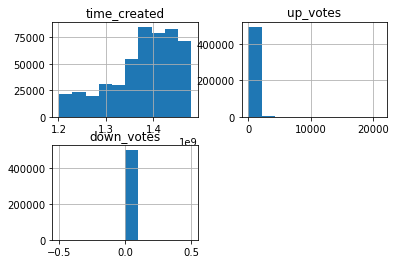

In [26]:
dataset.hist()

### Plotting the scatter plot of 'up_votes' to check if there are outliers

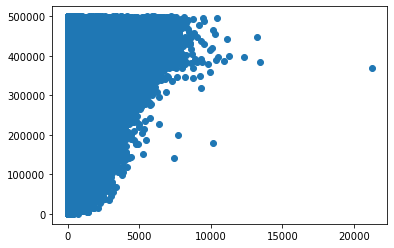

In [27]:
plt.scatter(dataset["up_votes"], dataset.index)
plt.show()